# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

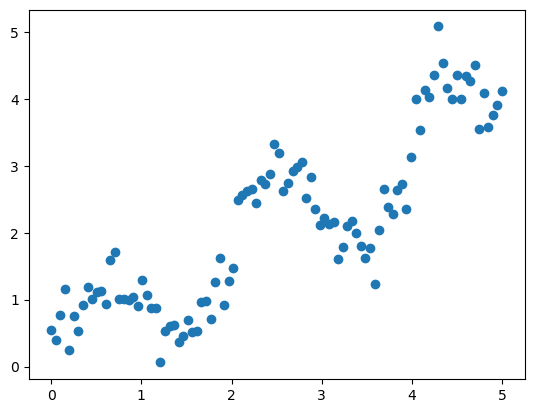

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.4432900142007623


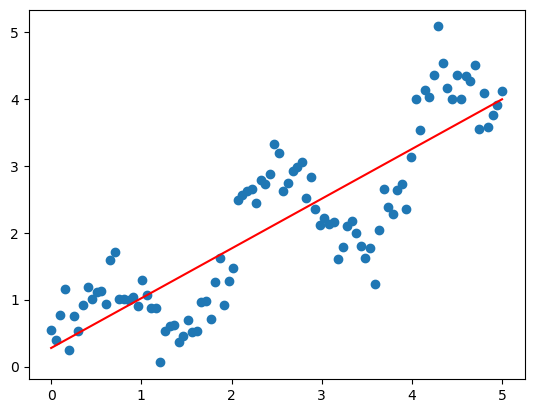

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

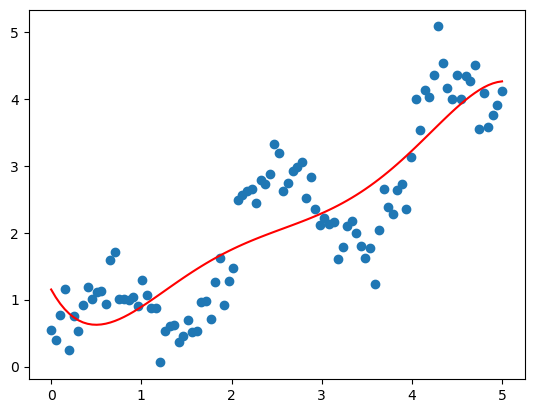

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-2.45200252  3.55214453 -1.68351575  0.34957072 -0.02607219]
interception:  1.151887712422206


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.15188771, 1.03689525, 0.93875443, 0.85624456, 0.78819746,
       0.73349649, 0.69107546, 0.65991763, 0.63905468, 0.62756568,
       0.62457606, 0.62925658, 0.64082232, 0.65853161, 0.68168507,
       0.7096245 , 0.74173193, 0.77742851, 0.81617358, 0.85746355,
       0.90083092, 0.94584326, 0.99210214, 1.03924213, 1.0869298 ,
       1.13486261, 1.18276798, 1.23040218, 1.27754935, 1.32402046,
       1.36965228, 1.41430635, 1.45786794, 1.50024505, 1.54136738,
       1.58118526, 1.61966867, 1.65680619, 1.69260398, 1.72708474,
       1.76028668, 1.79226253, 1.82307845, 1.85281305, 1.88155635,
       1.90940875, 1.93647998, 1.96288812, 1.98875852, 2.01422281,
       2.03941787, 2.06448475, 2.08956773, 2.1148132 , 2.14036872,
       2.1663819 , 2.19299946, 2.22036614, 2.24862369, 2.27790987,
       2.30835737, 2.34009282, 2.37323574, 2.40789756, 2.4441805 ,
       2.48217664, 2.52196683, 2.56361968, 2.60719053, 2.65272045,
       2.70023515, 2.749744  , 2.80123901, 2.85469376, 2.91006

In [15]:
regr_poly.predict(X_poly)

array([1.15188771, 1.03689525, 0.93875443, 0.85624456, 0.78819746,
       0.73349649, 0.69107546, 0.65991763, 0.63905468, 0.62756568,
       0.62457606, 0.62925658, 0.64082232, 0.65853161, 0.68168507,
       0.7096245 , 0.74173193, 0.77742851, 0.81617358, 0.85746355,
       0.90083092, 0.94584326, 0.99210214, 1.03924213, 1.0869298 ,
       1.13486261, 1.18276798, 1.23040218, 1.27754935, 1.32402046,
       1.36965228, 1.41430635, 1.45786794, 1.50024505, 1.54136738,
       1.58118526, 1.61966867, 1.65680619, 1.69260398, 1.72708474,
       1.76028668, 1.79226253, 1.82307845, 1.85281305, 1.88155635,
       1.90940875, 1.93647998, 1.96288812, 1.98875852, 2.01422281,
       2.03941787, 2.06448475, 2.08956773, 2.1148132 , 2.14036872,
       2.1663819 , 2.19299946, 2.22036614, 2.24862369, 2.27790987,
       2.30835737, 2.34009282, 2.37323574, 2.40789756, 2.4441805 ,
       2.48217664, 2.52196683, 2.56361968, 2.60719053, 2.65272045,
       2.70023515, 2.749744  , 2.80123901, 2.85469376, 2.91006

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

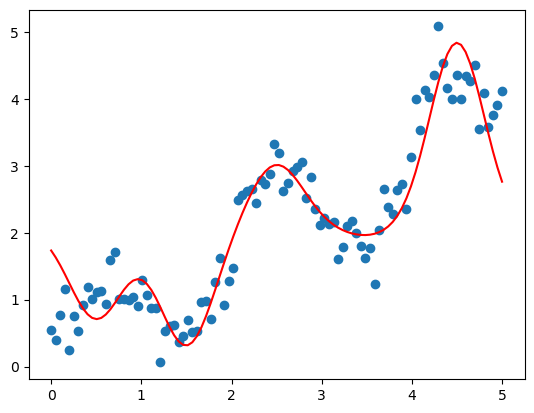

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [22]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.35704284 -1.75653852  0.94809002 -0.12142155  2.7671427 ]
interception:  2.0730239512130044


#### Comparison

In [23]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

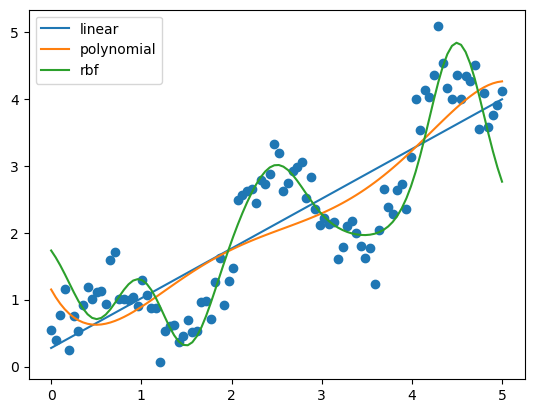

In [24]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [25]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.4432900142007623


In [26]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.3980544709300153


In [27]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.203922968155952
